In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplot inline

In [10]:
# Read in CSV file
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory Data Analysis

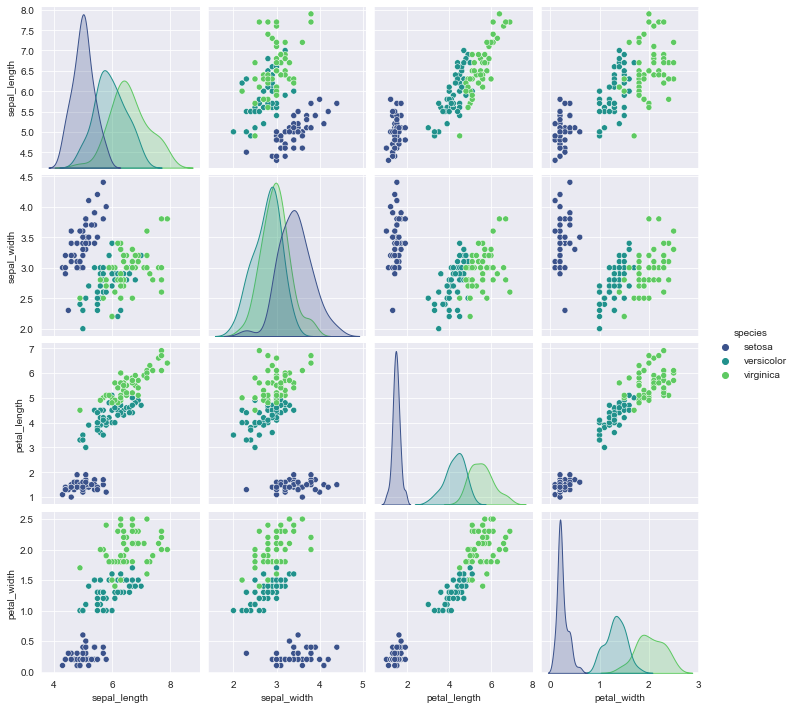

In [34]:
# Create pairplot to visualize relationships in data set
sns.set_style('darkgrid')
sns.pairplot(iris, hue='species', palette='viridis')

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

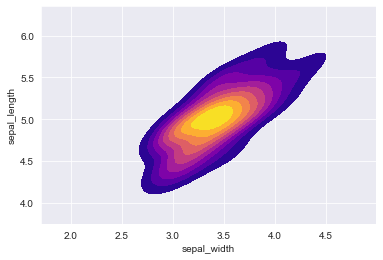

In [52]:
# Create kde plot of sepal width vs. sepal length 
setosa = iris[iris['species'] == 'setosa'][['sepal_length', 'sepal_width']]

sns.kdeplot(x='sepal_width', y='sepal_length', data=setosa, 
            shade=True, cmap='plasma', thresh=0.1)

# SVM Model

In [36]:
from sklearn.model_selection import train_test_split

In [53]:
# Create train and test data 
x = iris.drop('species', axis=1)
y = iris['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [38]:
from sklearn.svm import SVC

In [54]:
# Create and fit SVC model to train data
model = SVC()
model.fit(x_train, y_train)

SVC()

In [42]:
# Create predictions
predictions = model.predict(x_test)

In [43]:
# Evaluate model performance with test data
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



[[16  0  0]
 [ 0 10  0]
 [ 0  2 17]]


## Gridsearch

In [47]:
# Use GridSearch to optimize C and gamma to improve model performance
from sklearn.model_selection import GridSearchCV

In [55]:
# Create dictionary of C and gamma values
param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001]}

# Create GridSearchCV object and fit it to training data 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [50]:
# Create predictions with new model
grid_predictions = grid.predict(x_test)

In [51]:
# Evalaute performance of new model with test data
print(classification_report(y_test, grid_predictions))
print('\n')
print(confusion_matrix(y_test, grid_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.95      0.97        19

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



[[16  0  0]
 [ 0 10  0]
 [ 0  1 18]]
